# Python course 2021 - Exercises E

## Part1 - modules



---
1.1) Write all AGIs of AtCol0_exons.fasta into a new file!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import re   # Import RegEx (regular expression) module

def agi_list(file):
  agis = []
  with open(file, "r") as f:
    line = f.readline()
    with open("/content/drive/MyDrive/ColabNotebooks/UniPythonCourse/Exercises/data/AGIs_AtCol0.txt", 'w') as out:
      while line:
        agi = re.findall("AT\dG\d{5}", line)    # \d is an arbitrary decimal, \d{5} means five decimals successively
        if len(agi) > 0:
          agis.append(agi[0])
          out.write(agi[0])
        line = f.readline()
  return agis

agis = agi_list("/content/drive/MyDrive/ColabNotebooks/UniPythonCourse/Exercises/data/AtCol0_Exons.fasta")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---
1.2) Some IDs occur multiple times. Add a filter step to reduce the results to unique IDs!


In [4]:
unique_agis = set(agis)



---
1.3) Calculate the frequency of each AGI and construct a histogram (matplotlib)!
```python
plt.hist(<list_of_values>)    # tip
```




In [5]:
agi_hist = []
for agi in unique_agis:
  agi_hist.append((agi, agis.count(agi)))   # Append the AGIs as tuples of the AGI and its corresponding count

[1, 19, 2, 1, 5, 1, 2, 5, 1, 1, 1, 6, 1, 17, 1, 2, 1, 2, 1, 3, 1, 3, 14, 5, 1, 7, 15, 19, 5, 1, 5, 7, 15, 1, 2, 9, 10, 6, 10, 14, 7, 2, 4, 16, 14, 1, 26, 4, 5, 49, 14, 1, 1, 13, 1, 1, 2, 2, 1, 1, 7, 16, 1, 1, 1, 1, 1, 1, 1, 32, 12, 9, 4, 2, 5, 1, 1, 8, 2, 25, 1, 2, 8, 2, 1, 2, 39, 1, 1, 31, 6, 1, 3, 9, 1, 4, 1, 13, 2, 1, 38, 2, 1, 2, 1, 5, 11, 13, 1, 17, 1, 27, 3, 10, 7, 10, 8, 3, 17, 1, 6, 1, 17, 5, 2, 1, 14, 8, 2, 2, 2, 1, 1, 2, 8, 2, 2, 27, 21, 1, 3, 1, 1, 13, 7, 2, 1, 23, 2, 17, 4, 4, 1, 1, 3, 1, 17, 25, 1, 1, 3, 7, 1, 1, 1, 5, 1, 7, 3, 1, 3, 1, 4, 18, 40, 11, 1, 26, 1, 1, 19, 1, 5, 4, 2, 20, 2, 2, 15, 1, 8, 9, 2, 5, 2, 3, 2, 2, 3, 1, 3, 1, 10, 17, 6, 17, 1, 1, 18, 2, 3, 1, 1, 79, 11, 18, 7, 1, 27, 1, 1, 4, 4, 2, 2, 4, 3, 1, 1, 2, 6, 6, 11, 2, 18, 4, 1, 5, 18, 1, 1, 1, 3, 7, 6, 2, 8, 3, 2, 4, 5, 3, 1, 3, 1, 7, 12, 1, 1, 16, 5, 1, 1, 2, 1, 1, 2, 1, 2, 1, 28, 13, 1, 1, 5, 1, 18, 10, 1, 12, 19, 7, 35, 7, 1, 1, 1, 1, 9, 4, 3, 3, 19, 4, 41, 1, 1, 2, 1, 2, 26, 18, 6, 6, 9, 4, 4, 1, 1, 15

(array([2.734e+04, 3.613e+03, 1.285e+03, 4.800e+02, 2.870e+02, 1.610e+02,
        5.300e+01, 3.500e+01, 2.600e+01, 1.800e+01]),
 array([ 1. , 10.2, 19.4, 28.6, 37.8, 47. , 56.2, 65.4, 74.6, 83.8, 93. ]),
 <a list of 10 Patch objects>)

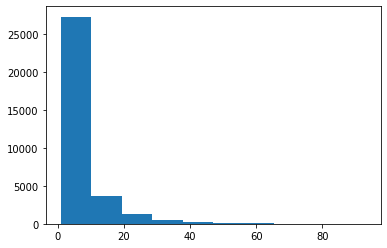

In [23]:
import matplotlib.pyplot as plt

# For plotting a histogram, we only need the frequencies
only_agi_counts = []
for (first, second) in agi_hist:
  only_agi_counts.append(second)
  
plt.hist(only_agi_counts)

The plot can be interpreted as, there are about 27000 AGIs that occur 0 to 10 times, about 3000 that occur 10 to 20 times and so on.

---
1.4) Create a bar chart with matplotlib that shows only the five most common AGIs.

```python
plt.bar(<list_of_values>)    # tip
```

{'AT5G47690': 99, 'AT1G02080': 99, 'AT1G21650': 98, 'AT5G61140': 98, 'AT3G05380': 95}


<BarContainer object of 5 artists>

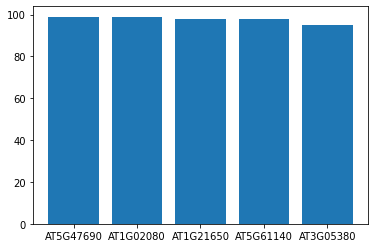

In [18]:
most_common_agis = {}
copy_of_agi_hist = agi_hist   # Make sure not to alter the original histogram for later applications
for i in range(5):
  current_max = ("", 0)   # Initialize the current maximum with minimal values
  for (agi, count) in copy_of_agi_hist:
    if count > current_max[1]:
      current_max = (agi, count)    # Update the maxiumum every time we see a higher value than the previous one
  most_common_agis[current_max[0]] = current_max[1]
  copy_of_agi_hist.remove(current_max)    # Now we're searching for the next most common AGI
print(most_common_agis)

plt.bar(range(len(most_common_agis)), list(most_common_agis.values()), tick_label = list(most_common_agis.keys()))